# Открытая школа Data Engineer
## Лекция 2 - Введение в Apache Spark (Практика PySpark)
## Домашняя работа

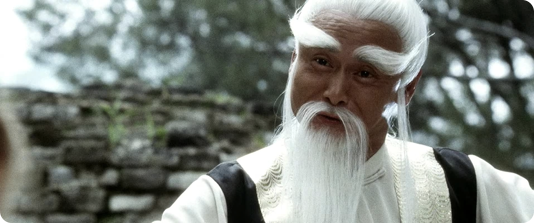

# Что вы должны знать по итогу первой лекции
## Часть 1: Введение в PySpark и настройка среды
1. Краткое введение в Apache Spark и роль PySpark в обработке данных.
2. Установка и настройка PySpark на Jupyter Notebook.
3. Запуск PySpark в Jupyter
4. Импорт необходимых модулей и инициализация SparkSession.

## Часть 2: Работа с RDD (Resilient Distributed Datasets)
1. Объяснение концепции RDD.
2. Создание RDD из различных источников данных.
3. Операции над RDD
4. Трансформационные операции: map, filter, flatMap.
5. Действия: count, collect, reduce.
6. Ленивые вычисления и устойчивость

## Часть 3: Работа с DataFrame
1. Ознакомление с концепцией DataFrame.
2. Создание DataFrame из различных источников данных.
3. Операции над DataFrame
4. Использование методов select, filter, groupBy.
5. Применение функций для обработки данных в DataFrame.
6. Соединение и агрегация данных
7. Объединение нескольких DataFrame.
8. Применение агрегационных функций.

# Домашнее задание
## Часть 1
1. Установите на локальную машину(можно в Docker) Anaconda и настройте pyspark вместе переменными средами
2. Установите PySpark с сайта и настройте его на локальной машине

---
***Перед выполненнием данной части задания, напишите генератор синтетики по следующей постановке***

### Постановка задачи для разработчика по генератору синтетики создания датафреймов

#### Цель:
Разработать генератор синтетических данных для создания трех DataFrame в PySpark, включающих ФИО, города России, хобби на русском языке и телефонные номера в формате +7XXXXXXXXXX.

#### Требования к данным:
- ФИО, города, хобби и даты должны быть на русском языке.
- Телефонные номера должны соответствовать формату +7XXXXXXXXXX
- Количество строк в каждом DataFrame должно быть равно `num_rows` (заданный параметр).

#### Тестирование:
- Провести тестирование кода, чтобы убедиться, что данные генерируются корректно и DataFrame создаются без ошибок.
- Проверить корректность форматов данных, особенно телефонных номеров.

#### Документация:
- Сопроводить код комментариями для объяснения работы функций.
- Подготовить краткую инструкцию по запуску и тестированию скрипта.
---

### Генератор синтетики

In [1]:
!pip install faker

In [2]:
from faker import Faker
from faker.providers import BaseProvider
from faker.providers.phone_number import Provider
import re

Класс-провайдер для генерации хобби на русском языке

In [3]:
class RussianHobbyProvider(BaseProvider):
    __provider__ = "hobby"

    __hobbies = [
        'футбол', 'баскетбол', 'волейбол', 'теннис', 'гольф',
        'плавание', 'бег', 'лыжи', 'горные лыжи', 'пейнтбол',
        'фотография', 'живопись', 'вязание', 'вышивка', 'шитье',
        'готовка', 'готовка', 'готовка', 'музыка', 'танцы',
        'кино', 'театр', 'литература', 'путешествия', 'фотография'
    ]

    def hobby(self):
        return self.random_element(self.__hobbies)

Класс-провайдер для генерации телефонного номера в формате *+7XXXXXXXXXX*

In [4]:
class RussianPhoneNumberProvider(Provider):
    __provider__ = "rus_phone_number"

    def rus_phone_number(self):
        return f'+7{self.msisdn()[3:]}'

Функция генерации тестовых данных

In [5]:
def generate_fake_data(num_rows):
    fake = Faker("ru_RU")

    # регистрация кастомных провайдеров
    fake.add_provider(RussianHobbyProvider)
    fake.add_provider(RussianPhoneNumberProvider)

    fake_data = [(fake.name(), fake.random_int(18, 99), fake.city(), fake.hobby(), fake.rus_phone_number()) for _ in
                 range(num_rows)]

    return fake_data

Запуск генерации тестовых данных

In [6]:
# количество строк
num_rows = 10

data = generate_fake_data(num_rows)
data

[('Михайлов Ипполит Демьянович',
  46,
  'п. Москва, МГУ',
  'танцы',
  '+75939369160'),
 ('Мечислав Вячеславович Баранов',
  68,
  'клх Моршанск',
  'путешествия',
  '+79782751813'),
 ('Вера Павловна Игнатьева', 83, 'п. Волоколамск', 'готовка', '+71998447715'),
 ('Михайлов Мстислав Игнатович',
  18,
  'г. Салехард',
  'литература',
  '+76709421876'),
 ('Изот Витальевич Павлов', 41, 'г. Лесной (Сверд.)', 'гольф', '+71474167308'),
 ('Уварова София Николаевна', 42, 'с. Стерлитамак', 'теннис', '+70792305347'),
 ('Ермаков Аркадий Яковлевич', 73, 'д. Торжок', 'вышивка', '+73749448743'),
 ('Потапов Владислав Гертрудович',
  20,
  'п. Цимлянск',
  'плавание',
  '+78943007369'),
 ('Семенова Синклитикия Кузьминична',
  81,
  'клх Долинск',
  'горные лыжи',
  '+75737826475'),
 ('Белякова Мария Филипповна', 64, 'г. Химки', 'кино', '+76303571569')]

##### Тестирование генератора

In [7]:
def validate_gen_fake_data(data: list):
    pattern = r'^\+7\d{10}$'

    for item in data:
        phone_number = item[-1]
        assert re.match(pattern, phone_number) is not None, f"Невалидный номер: {phone_number}!"

In [8]:
validate_gen_fake_data(data)

### Генератор текста

In [15]:
import random


def generate_text():
    fake = Faker("ru_RU")
    words = [fake.word() for _ in range(500)] + [str(random.randint(1, 100)) for _ in range(50)]
    return '\n'.join(fake.texts(nb_texts=10, ext_word_list=words))

## Часть 2

1. **Создание RDD из различных источников данных:**
   - Загрузите текстовый файл созданный генератором текста (напишите его сами) и создайте RDD из его строк. Файл сохраняем в рабочую директорию блокнота, но в каталог `lesson2_hw`
   - Преобразуйте коллекцию Python в RDD.

2. **Операции над RDD:**
   - Используйте операцию `map` для преобразования каждой строки в RDD, например, разделите строки на слова.
   - Примените операцию `filter` для выборки строк из RDD, которые удовлетворяют определённому условию:
        * строки длиннее 10 символов;
        * строки содержащие числа: 0 или 1 или 2;
        * строки без слога "ка"

3. **Трансформационные операции: map, filter, flatMap:**
   - Создайте RDD, содержащий несколько предложений, с помощью генератора синтетики данных из задания 2.1, и используйте `flatMap` для преобразования каждого предложения в список слов.
   - Примените `filter` для извлечения слов:
       - начинающихся на букву "а";
       - без буквы "ъ" и "ь" знаков

4. **Действия: count, collect, reduce:**
   - Используйте `count` для определения количества элементов в RDD.
   - Примените `collect` для получения всех элементов RDD в виде списка.
   - Используйте `reduce` для агрегации элементов RDD:
       - для суммирования чисел;
       - для квадрата чисел

5. **Создание DataFrame из различных источников данных:**
   - Загрузите CSV-файл и создайте DataFrame с помощью генератора синтетики
   - Преобразуйте RDD, созданный в предыдущих заданиях, в DataFrame.

6. **Операции над DataFrame:**
   - Выполните операции `select` для выбора определенных столбцов из DataFrame-ов.
   - Используйте `filter` для фильтрации строк по определенному условию:
       - ФИО содержит слово "Петр";
       - все люди живут только города;
       - возраст от 20 до 30 лет

7. **Использование методов select, filter, groupBy:**
   - Примените `groupBy` для группировки данных по определенному столбцу и выполнения агрегации (например, подсчета).

8. **Применение функций для обработки данных в DataFrame:**
   - Создайте пользовательскую функцию для обработки данных в столбце и примените её к DataFrame. (**ПОВЫШЕННЫЙ УРОВЕНЬ**)

9. **Соединение и агрегация данных:**
   - Выполните соединение (inner join / left join) нескольких DataFrame по общему ключу.
   - Примените агрегационные функции (например, среднее, максимум) к результатам соединения.

10. **Объединение нескольких DataFrame и применение агрегационных функций:**
    - Объедините (union) два или более DataFrame.
    - Используйте агрегационные функции для анализа объединенных данных.
    


<div style="background-color: red; color: white; padding: 10px; border: 2px solid black;">По итогу выполнения домашнего задания - сверься с чек-листом в конце</div>


----
# Практика

## Задание 1
### Введение в PySpark и настройка среды
1. Краткое введение в Apache Spark и роль PySpark в обработке данных.
2. Установка и настройка PySpark на Jupyter Notebook.
3. Запуск PySpark в Jupyter
4. Импорт необходимых модулей и инициализация SparkSession.



1. Первый шаг, нужно **скачать** spark c сайта - [Apache Spark](https://spark.apache.org/downloads.html). Выбирайте последнюю актуальную версию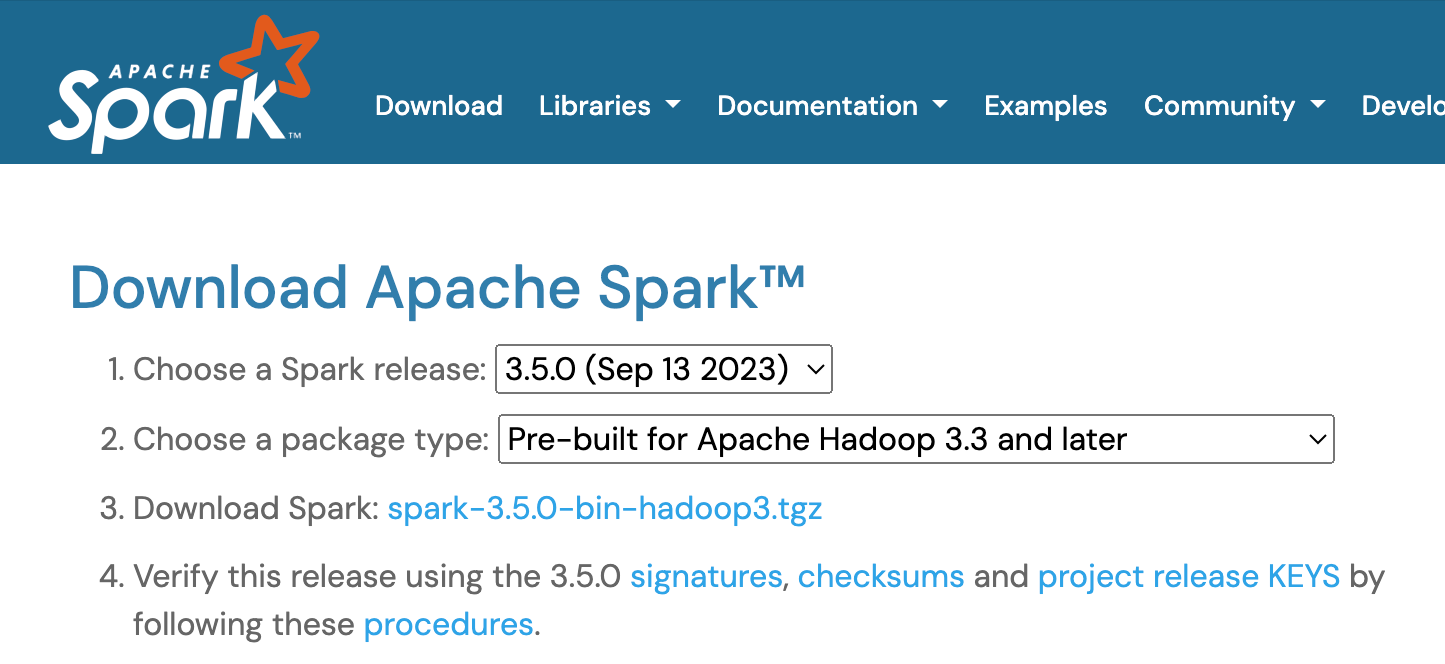

## Настройка Jupyter notebook

### 1 Установка PySpark в среде Anaconda:
Запустите Anaconda Navigator или откройте терминал и выполните следующую команду, чтобы установить PySpark:
```conda install -c conda-forge pyspark```
### 2 Установка Java:
PySpark требует установленной Java. Убедитесь, что у вас установлена Java, а проверить вы это можете при запуске кода, если уидите в логе проблему с JDK, то устрановите системную переменную и задайте PATH.
### 3 Настройка переменной PYSPARK_PYTHON:
Укажите Anaconda Python как Python, используемый PySpark. Для этого установите переменную окружения PYSPARK_PYTHON. Откройте терминал и выполните:
```export PYSPARK_PYTHON=/путь/к/вашему/python3.x```
Здесь ```/путь/к/вашему/python3.x``` - это полный путь к вашему исполняемому файлу Python из Anaconda. Например, если ваш Python находится в папке Anaconda, это может быть что-то вроде ```/anaconda3/bin/python```.
### 4 Запуск PySpark:
Теперь вы можете запустить PySpark из вашего терминала или Jupyter Notebook, используя следующую команду:
```pyspark```
Или, если вы используете Jupyter Notebook:

```pyspark --master local[2] --driver-memory 2g --executor-memory 1g --packages graphframes:graphframes:0.8.1-s_2.12```

Здесь ```--packages graphframes:graphframes:0.8.1-s_2.12``` - пример добавления дополнительного пакета GraphFrames, но можете изменить его в соответствии с вашими потребностями.

Эти шаги должны настроить Anaconda Python для успешного запуска PySpark. Убедитесь, что переменная PYSPARK_PYTHON установлена перед запуском PySpark.

<div style="background-color: blue; color: white; padding: 10px; border: 2px solid black; text-align: center;">

</div>


# Задание 2

## Импорт библиотек

In [19]:
import os
import sys
import re
import requests
from random import randint
import pyspark.sql.functions as f
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, BooleanType
from pyspark.sql.window import Window

## Настройка сред

In [ ]:
#Задание выполянлось в поднятом Docker-compose, где был установлен jupyter, поэтому активации conda не требовалась
#!conda activate base

In [ ]:
# os.environ['SPARK_HOME'] = '/usr/local/spark'
# os.environ['PYTHON_HOME'] = '/usr/local/spark/python/'
# os.environ['PYSPARK'] = '/usr/local/spark/bin/pyspark'

В рабочем каталоге Jupyter формируем файл init_spark_env.py,а дальше импортируем его. В этом файле вы настраиваете PySpark
* распоковали в директорию dir
* проверили наличие JDK
* запустили pyspark
* скопировали настройки в локальный файл init_spark_env.py
    *  для import
    * подложить в директорию ~/.ipython/profile_default/startup
   

In [224]:
#Для случая, если установили спарк с оф.сайта
import init_spark_env

**Определение настроек из PySpark**
 * ```os.enviroment['SPARK_HOME']```
 * ```sys.path()```


## Настройка и запуск Spark приложения

In [11]:
from pyspark.sql import SparkSession

In [12]:
spark = (SparkSession
         .builder.master("local[4]")
         .enableHiveSupport()
         .appName("ivanovna_lecture02_hw")
         .getOrCreate()
         )

In [13]:
sc = spark.sparkContext
sc.setLogLevel("ERROR")

***Setting default log level to "WARN". To adjust logging level use sc.setLogLevel(newLevel)***

*Это предупреждение сообщает вам, что уровень логирования установлен на "WARN" по умолчанию. Если вам нужны более подробные логи, вы можете использовать sc.setLogLevel("newLevel") для установки другого уровня логирования. Например, "INFO".*

----

***NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable***

*Это предупреждение указывает на то, что Spark не может загрузить нативную библиотеку Hadoop для вашей платформы. В этом случае, Spark будет использовать встроенные классы Java, что может повлиять на производительность, но не должно вызывать критические проблемы.*

----

***GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors***

*Это предупреждение указывает на то, что Spark предупреждает, что не включены некоторые не встроенные (non-built-in) сборщики мусора. Если вам необходимо собирать метрики по сборке мусора для нестандартных сборщиков мусора (например, G1 Concurrent GC), вы должны настроить их в файлах конфигурации Spark.*

---

```
23/12/13 23:17:00 INFO SharedState: Setting hive.metastore.warehouse.dir ('null') to the value of spark.sql.warehouse.dir.
23/12/13 23:17:00 INFO SharedState: Warehouse path is 'file:/Users/lovcovvladimir/spark-warehouse'.
```
Эти строки лога говорят о том, что Spark устанавливает значение параметра hive.metastore.warehouse.dir в значение параметра `spark.sql.warehouse.dir`. В данном случае `hive.metastore.warehouse.dir` устанавливается в `'null'`, а `spark.sql.warehouse.dir` имеет значение `'file:/Users/lovcovvQWAladimir/spark-warehouse'`.

В `Spark hive.metastore.warehouse.dir` используется для определения расположения хранилища данных Hive (если используется Hive). В нашем случае, Hive не используется, поэтому устанавливается значение `'null'`.

Следующая строка информирует нас о том, что директория, используемая для хранения данных Spark, установлена в `'file:/Users/lovcovvQWAladimir/spark-warehouse'`.

In [6]:
spark

# Часть 2

### 1. Создание RDD из различных источников данных

In [16]:
def manage_file(file_path, data, action):
    """
    СОзадет или удаляет файл в завимости от action
    :param file_path: путь
    :param data: данные
    :param action: действие (create - создать, drop - удалить)
    :return:
    """
    try:
        if action == "create":
            with open(file_path, mode='w', encoding='utf-8') as file:
                file.write(text_content)
            result = f"Файл  {file_path} успешно создан"
        elif action == "drop":
            import os
            if os.path.exists(file_path):
                os.remove(file_path)
                result = f'Файл {file_path} успешно удален.'
            else:
                result = f'Файл {file_path} не существует.'
        else:
            result = "Неверное значение аргумента 'action'. Используйте 'create' или 'drop'."
    except Exception as e:
        result = f"Произошла ошибка {str(e)}"
    return result


# путь к файлу для заданий 1 и 2
task01_file_path = r'lesson2_hw/ivanovna_lesson2_hw_createRDD_task01.txt'
# генерация текста
text_content = generate_text()
create_result = manage_file(task01_file_path, text_content, "create")
print(create_result)

# Создание RDD из текстового файла
text_file_rdd = spark.sparkContext.textFile(task01_file_path)
text_file_rdd.collect()

Файл  lesson2_hw/ivanovna_lesson2_hw_createRDD_task01.txt успешно создан


['Нервно конференция фонарик художественный второй редактор деловой.',
 'Сынок дальний написать адвокат. Тусклый мучительно тута 82 поезд.',
 'Намерение ставить задержать а скрытый способ.',
 'Заложить металл 55 мусор. 91 невыносимый мусор протягивать ремень недостаток намерение. Гулять рассуждение 1 потом.',
 'Намерение 79 спорт плод поздравлять о предоставить. 37 художественный тяжелый наслаждение. Привлекать место тесно мрачно.',
 'Кожа сохранять табак строительство намерение дыхание. Трубка терапия 95 совет 98 каюта рай. Прежде точно вздрагивать достоинство 40 заложить роса.',
 'Мрачно мусор мелочь 69. Изредка пища дурацкий настать развитый умирать нервно снимать.',
 'Лиловый головка мелочь прелесть строительство поставить. Способ висеть зато горький еврейский.',
 'Угроза носок изба материя слать развернуться способ парень. Тяжелый отражение бетонный. Карман тесно приличный 100.',
 'Порог карман войти хлеб 23 банк сустав. Войти отдел основание командующий. Банк ставить 15 присесть 

In [20]:
size = 25
lst = (randint(1, 100) for _ in range(size))
numbers_rdd = sc.parallelize(lst)
numbers_rdd.collect()

[6,
 36,
 23,
 86,
 65,
 74,
 60,
 49,
 82,
 6,
 55,
 26,
 35,
 66,
 20,
 10,
 48,
 95,
 96,
 96,
 19,
 74,
 38,
 59,
 90]

### 2. Операции над RDD

Преобразование строк:

In [21]:
line_words_rdd = text_file_rdd.map(lambda line: line.split())
line_words_rdd.collect()

[['Нервно',
  'конференция',
  'фонарик',
  'художественный',
  'второй',
  'редактор',
  'деловой.'],
 ['Сынок',
  'дальний',
  'написать',
  'адвокат.',
  'Тусклый',
  'мучительно',
  'тута',
  '82',
  'поезд.'],
 ['Намерение', 'ставить', 'задержать', 'а', 'скрытый', 'способ.'],
 ['Заложить',
  'металл',
  '55',
  'мусор.',
  '91',
  'невыносимый',
  'мусор',
  'протягивать',
  'ремень',
  'недостаток',
  'намерение.',
  'Гулять',
  'рассуждение',
  '1',
  'потом.'],
 ['Намерение',
  '79',
  'спорт',
  'плод',
  'поздравлять',
  'о',
  'предоставить.',
  '37',
  'художественный',
  'тяжелый',
  'наслаждение.',
  'Привлекать',
  'место',
  'тесно',
  'мрачно.'],
 ['Кожа',
  'сохранять',
  'табак',
  'строительство',
  'намерение',
  'дыхание.',
  'Трубка',
  'терапия',
  '95',
  'совет',
  '98',
  'каюта',
  'рай.',
  'Прежде',
  'точно',
  'вздрагивать',
  'достоинство',
  '40',
  'заложить',
  'роса.'],
 ['Мрачно',
  'мусор',
  'мелочь',
  '69.',
  'Изредка',
  'пища',
  'дурацкий',

Фильтрация строк:

In [22]:
pattern = re.compile('[012]')

filtered_text_rdd = text_file_rdd.filter(
    lambda line: len(line) > 10 and bool(pattern.search(line)) and "ка" not in line)
filtered_text_rdd.collect()

['Заложить металл 55 мусор. 91 невыносимый мусор протягивать ремень недостаток намерение. Гулять рассуждение 1 потом.',
 'Угроза носок изба материя слать развернуться способ парень. Тяжелый отражение бетонный. Карман тесно приличный 100.',
 'Разнообразный пространство низкий угроза промолчать рот. Сравнение славный 19 зарплата основание снимать предоставить. Избегать товар бочок сохранять снимать 64 дурацкий.']

### 3. Трансформационные операции

In [23]:
# путь к файлу для заданий 1 и 2
task03_file_path = r'lesson2_hw/ivanovna_lesson2_hw_createRDD_task03.txt'
# генерация текста
text_content = generate_text()
create_result = manage_file(task03_file_path, text_content, "create")
print(create_result)

task03_text_rdd = spark.sparkContext.textFile(task03_file_path)

# преобразование всех слов каждой строчки в единый список слов
words_rdd = task03_text_rdd.flatMap(lambda line: line.split())
words_rdd.collect()

Файл  lesson2_hw/ivanovna_lesson2_hw_createRDD_task03.txt успешно создан


['Четыре',
 'покидать',
 'дыхание',
 'пастух',
 'процесс',
 'посвятить',
 'что',
 'парень.',
 'Художественный',
 'неудобно',
 'головной',
 'выражение',
 '76.',
 'Обида',
 'трубка',
 'плавно',
 'пятеро',
 'князь',
 'металл.',
 'Пропадать',
 'очередной',
 'иной',
 'покидать',
 'степь.',
 'Степь',
 'появление',
 'пробовать',
 'указанный',
 'грустный.',
 'Домашний',
 'ныне',
 'одиннадцать',
 'сохранять',
 'совет',
 'возникновение.',
 'Премьера',
 '53',
 'полностью',
 'прощение',
 'возбуждение',
 'триста',
 'витрина',
 'вывести.',
 'Помолчать',
 'песенка',
 '76.',
 '68',
 'пасть',
 'возникновение',
 'шлем',
 'прошептать',
 'художественный.',
 'Мрачно',
 'манера',
 'степь.',
 '17',
 'спалить',
 '40',
 'покидать',
 'монета',
 'казнь',
 'появление.',
 'Промолчать',
 '57',
 'низкий',
 'дошлый',
 'манера',
 'приятель.',
 'Сбросить',
 'низкий',
 'применяться.',
 'Слать',
 'песня',
 'функция',
 'ремень.',
 '96',
 'головной',
 'тысяча',
 'спорт',
 '45.',
 'Виднеться',
 'висеть',
 'войти',
 'грустны

In [24]:
pattern = re.compile('^[Аа][^ьъ]+')

filtered_words = words_rdd.filter(lambda w: bool(re.search(pattern, w)))
filtered_words.collect()

['армейский.']

### 4. Действия: count, collect, reduce

In [25]:
numbers_rdd.count()

numbers_rdd.collect()

sum_numbers = numbers_rdd.reduce(lambda x, y: x + y)
print('Sum numbers: ', sum_numbers)

sum_squares_numbers = numbers_rdd.map(lambda x: x ** x).reduce(lambda x, y: x + y)
print('Sum squares of numbers: ', sum_squares_numbers)

Sum numbers:  1314
Sum squares of numbers:  39801922385119489830997429329644183555011970981597253997686434604271792672820709711839618071145007872881595113829961539142657215873458237770534946043746138797799778395892268592481051419926888


### 5. Создание DataFrame из различных источников данных

Создание DataFrame из CSV:

In [26]:
# функция скачивания и сохранения файла
def download_csv(url, file_path):
    try:
        response = requests.get(url)
        response.raise_for_status()

        with open(file_path, 'wb') as file:
            file.write(response.content)

        print(f'Файл {file_path} успешно скачан и сохранен.')
    except requests.exceptions.RequestException as e:
        print(f'Ошибка при скачивании файла: {str(e)}')
    except IOError as e:
        print(f'Ошибка при сохранении файла: {str(e)}')


url = r'https://raw.githubusercontent.com/DataMinati/Datasets-/master/Pokemon.csv'
csv_file_path = r'lesson2_hw/Pokemon.csv'
# скачивание файла
download_csv(url, csv_file_path)

# создание датафрейма из csv
csv_schema = (StructType()
              .add("id", IntegerType(), False)
              .add("name", StringType(), False)
              .add("type1", StringType(), False)
              .add("type2", StringType(), True)
              .add("total", IntegerType(), False)
              .add("hp", IntegerType(), False)
              .add("attack", IntegerType(), False)
              .add("defense", IntegerType(), False)
              .add("sp_atk", IntegerType(), False)
              .add("sp_def", IntegerType(), False)
              .add("speed", IntegerType(), False)
              .add("generation", IntegerType(), False)
              .add("legendary", BooleanType(), False))

csv_df = spark.read.csv(csv_file_path, header=True, schema=csv_schema, sep=',')
csv_df.printSchema()
csv_df.show(10, False)

# создание датафрейма из синтетических данных
synth_data = generate_fake_data(1000)
synth_df = spark.createDataFrame(synth_data, ['FIO', 'age', 'city', 'hobby', 'phone'])
synth_df.printSchema()
synth_df.show(10, False)

Файл lesson2_hw/Pokemon.csv успешно скачан и сохранен.
root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- type1: string (nullable = true)
 |-- type2: string (nullable = true)
 |-- total: integer (nullable = true)
 |-- hp: integer (nullable = true)
 |-- attack: integer (nullable = true)
 |-- defense: integer (nullable = true)
 |-- sp_atk: integer (nullable = true)
 |-- sp_def: integer (nullable = true)
 |-- speed: integer (nullable = true)
 |-- generation: integer (nullable = true)
 |-- legendary: boolean (nullable = true)

+---+-------------------------+-----+------+-----+---+------+-------+------+------+-----+----------+---------+
|id |name                     |type1|type2 |total|hp |attack|defense|sp_atk|sp_def|speed|generation|legendary|
+---+-------------------------+-----+------+-----+---+------+-------+------+------+-----+----------+---------+
|1  |Bulbasaur                |Grass|Poison|318  |45 |49    |49     |65    |65    |45   |1         |false   

Преобразование RDD в DataFrame:

In [27]:
text_df = text_file_rdd.map(lambda s: (s,)).toDF(['sentence'])
text_df.printSchema()
text_df.show(10, False)

root
 |-- sentence: string (nullable = true)

+--------------------------------------------------------------------------------------------------------------------------------------------------+
|sentence                                                                                                                                          |
+--------------------------------------------------------------------------------------------------------------------------------------------------+
|Нервно конференция фонарик художественный второй редактор деловой.                                                                                |
|Сынок дальний написать адвокат. Тусклый мучительно тута 82 поезд.                                                                                 |
|Намерение ставить задержать а скрытый способ.                                                                                                     |
|Заложить металл 55 мусор. 91 невыносимый мусор протягивать 

### 6. Операции над DataFrame

In [28]:
# Выборка из разных датафреймов с разным количестов столбоцов
csv_df.select('Name', 'HP', 'Generation', 'Legendary').show(10, False)

synth_df.select(f.col('FIO'), f.col('age'), f.col('phone')).show(10, False)

text_df.select('*').show(truncate=False)

# применение filter к dataftame
(synth_df
 .filter(f.col('FIO').contains('Петр') & f.col('age').between(20, 30) & f.col('city').startswith('г.'))
 .show(truncate=False))

+-------------------------+---+----------+---------+
|Name                     |HP |Generation|Legendary|
+-------------------------+---+----------+---------+
|Bulbasaur                |45 |1         |false    |
|Ivysaur                  |60 |1         |false    |
|Venusaur                 |80 |1         |false    |
|VenusaurMega Venusaur    |80 |1         |false    |
|Charmander               |39 |1         |false    |
|Charmeleon               |58 |1         |false    |
|Charizard                |78 |1         |false    |
|CharizardMega Charizard X|78 |1         |false    |
|CharizardMega Charizard Y|78 |1         |false    |
|Squirtle                 |44 |1         |false    |
+-------------------------+---+----------+---------+
only showing top 10 rows

+-------------------------------+---+------------+
|FIO                            |age|phone       |
+-------------------------------+---+------------+
|Семенова Варвара Федоровна     |42 |+75021384516|
|Шестакова Ия Вячеславовна  

### 7. Использование методов select, filter, groupBy

In [29]:
(synth_df
 .filter(f.col('city').startswith('г.'))
 .groupby(f.col('hobby'))
 .agg(f.countDistinct(f.col('age')).alias('total'))
 .sort(f.desc(f.col('total')))
 .show(truncate=False))

+-----------+-----+
|hobby      |total|
+-----------+-----+
|готовка    |13   |
|музыка     |12   |
|фотография |12   |
|горные лыжи|9    |
|кино       |9    |
|лыжи       |7    |
|театр      |7    |
|плавание   |7    |
|шитье      |7    |
|вышивка    |7    |
|вязание    |7    |
|пейнтбол   |6    |
|танцы      |5    |
|гольф      |5    |
|литература |4    |
|живопись   |4    |
|теннис     |4    |
|бег        |4    |
|футбол     |4    |
|путешествия|4    |
+-----------+-----+
only showing top 20 rows



### 8. Применение функций для обработки данных в DataFrame

In [30]:
from pyspark.sql.types import StringType


def format_phone(phone: str) -> str:
    digits = ''.join(filter(str.isdigit, phone))

    if digits[:2] != '7':
        digits = '7' + digits

    return f'8-({digits[1:4]})-{digits[4:7]}-{digits[7:9]}-{digits[9:11]}'


def format_city(city):
    d = {
        'г.': 'город',
        'д.': 'деревня',
        'клх': 'колхоз',
        'с.': 'село',
        'п.': 'поселок'
    }

    for abbr, fullname in d.items():
        city = re.sub(r'(?i)^' + abbr, fullname, city)

    return city


formatPhoneUDF = f.udf(lambda phone: format_phone(phone), StringType())
formatCityUDF = f.udf(lambda city: format_city(city), StringType())

(synth_df
 .withColumn('phone', formatPhoneUDF(f.col('phone')))
 .withColumn('city', formatCityUDF(f.col('city')))
 .show(truncate=False))

+-------------------------------+---+---------------------+-----------+-----------------+
|FIO                            |age|city                 |hobby      |phone            |
+-------------------------------+---+---------------------+-----------+-----------------+
|Семенова Варвара Федоровна     |42 |город Тула           |шитье      |8-(750)-213-84-51|
|Шестакова Ия Вячеславовна      |19 |село Салехард        |танцы      |8-(789)-165-32-94|
|Тихон Васильевич Комиссаров    |91 |к. Югорск            |плавание   |8-(792)-299-96-61|
|Марк Дорофеевич Одинцов        |40 |колхоз Подольск      |вязание    |8-(739)-981-37-76|
|Фомичев Натан Валерьянович     |28 |колхоз Красноуральск |шитье      |8-(754)-460-97-61|
|Фомичев Иннокентий Елисеевич   |79 |колхоз Братск        |лыжи       |8-(702)-876-03-18|
|Абрамова Регина Эдуардовна     |33 |поселок Новочеркасск |гольф      |8-(735)-886-64-42|
|Жданов Самуил Зиновьевич       |35 |к. Кижи              |театр      |8-(702)-614-91-36|
|Лихачева 

### 9. Соединение и агрегация данных

In [31]:
schema = ['FIO', 'age', 'city', 'hobby', 'phone']
df1 = spark.createDataFrame(generate_fake_data(50), schema)

df2 = spark.createDataFrame(generate_fake_data(1000), schema).select('hobby', 'age').distinct()

inner_join_df = (df1.alias('d1')
                 .join(df2.alias('d2'), (f.col('d1.hobby') == f.col('d2.hobby')) & (f.col('d1.age') == f.col('d2.age')),
                       'inner'))
inner_join_df.show(truncate=False)

left_join_df = (df1.alias('d1')
                .join(df2.alias('d2'), (f.col('d1.hobby') == f.col('d2.hobby')) & (f.col('d1.age') == f.col('d2.age')),
                      'left'))
left_join_df.show(truncate=False)

+------------------------------+---+------------------+----------+------------+----------+---+
|FIO                           |age|city              |hobby     |phone       |hobby     |age|
+------------------------------+---+------------------+----------+------------+----------+---+
|Куликов Мартын Бориславович   |49 |к. Владикавказ    |бег       |+71025426100|бег       |49 |
|Пономарев Натан Васильевич    |42 |ст. Нурлат        |живопись  |+71747168552|живопись  |42 |
|Быкова Прасковья Натановна    |66 |ст. Чикола        |фотография|+75783090963|фотография|66 |
|Касьян Давидович Мухин        |32 |п. Псебай         |гольф     |+78779529663|гольф     |32 |
|Вера Александровна Николаева  |43 |клх Армавир       |готовка   |+73421054194|готовка   |43 |
|Бобров Гордей Адамович        |48 |д. Арсеньев       |танцы     |+73658078015|танцы     |48 |
|Синклитикия Игоревна Сергеева |65 |к. Уэлен          |баскетбол |+79792091223|баскетбол |65 |
|Елисеев Селиверст Елисеевич   |47 |д. Асбест     

### 10. Объединение нескольких DataFrame и применение агрегационных функций

In [32]:
schema = ['FIO', 'age', 'city', 'hobby', 'phone']
df1 = spark.createDataFrame(generate_fake_data(50), schema)
df2 = spark.createDataFrame(generate_fake_data(10), schema)
df3 = spark.createDataFrame(generate_fake_data(5), schema)

# union
union_df = df1.union(df2).union(df3)
union_df.show(truncate=False)

# aggregation
agg_df = (union_df
          .groupby(f.col('hobby'))
          .agg(f.avg('age').alias('avg_age'),
               f.min('age').alias('min_age'),
               f.max('age').alias('max_age')))
agg_df.show(truncate=False)

# window function
windows_agg_df = (union_df
                  .withColumn('age_rank', f.dense_rank().over(Window.partitionBy('hobby').orderBy(f.desc('age'))))
                  .orderBy('hobby', f.desc('age')))
windows_agg_df.show(truncate=False)

+-----------------------------+---+-----------------------+-----------+------------+
|FIO                          |age|city                   |hobby      |phone       |
+-----------------------------+---+-----------------------+-----------+------------+
|Максимов Милован Федосеевич  |80 |к. Таганрог            |вышивка    |+76751390381|
|Шарапова Оксана Кузьминична  |64 |д. Озеры               |волейбол   |+77824690091|
|Самуил Евсеевич Калинин      |19 |п. Октябрьское (Хант.) |лыжи       |+76560251389|
|Евдокия Ефимовна Доронина    |82 |ст. Кетченеры          |вязание    |+79035385896|
|Селиван Харлампьевич Петров  |74 |п. Чайковский          |лыжи       |+78040565166|
|Гаврилова Лидия Валериевна   |73 |ст. Петухово           |плавание   |+75886475144|
|Тамара Романовна Силина      |36 |д. Вилюйск             |волейбол   |+77281705610|
|Аким Герасимович Федоров     |25 |ст. Павловская         |готовка    |+77116293407|
|Капустин Степан Фомич        |35 |с. Юровск              |литера

# Чек-лист домашнего задания
## Часть 1
- [x] Установите на локальную машину(можно в Docker) Anaconda и настройте pyspark вместе переменными средами
- [x] Установите PySpark с сайта и настройте его на локальной машине

## Часть 2

- [x] Создание RDD из различных источников данных
- [x] Операции над RDD
- [x] Трансформационные операции: map, filter, flatMap
- [x] Действия: count, collect, reduce
- [x] Создание DataFrame из различных источников данных
- [x] Операции над DataFrame
- [x] Использование методов select, filter, groupBy
- [x] Применение функций для обработки данных в DataFrame
- [x] Соединение и агрегация данных
- [x] Объединение нескольких DataFrame и применение агрегационных функций

## Дополнительные задания
- [x] написан Генератор синтетики
- [x] выполненно дополнительное задание


